# Who is the GOAT (Greatest of All Time)

![title](james.jpg)
![title](jordan.jpg)
![title](kobe.jpg)

A constant debate amongst NBA fans is who is 'better' at basketball, Michael Jordan? Kobe Bryant? Or Lebron James? Being a huge basketball fan myself, and not particularly bias towards any of these players, I wanted to compare their stats for regular season games and playoffs to observe any outliers or a clear objective truth as to who is the better player. I want to use the seaborn library to have helpful visuals on the underlying statistics. In the future, any new upcoming \"GOATS\" can be compared to the 3 we're analyzing today to see if they fit in the molds of LBJ, Kobe, or MJ; or if they're in a league all on their own.

## Visualization Technique

I plan to use a variation of visulization techniques to compare the basketball players. Scatter plots to show possible correlation between stats, density plots to show distribution in points, assists, and rebounds, histograms for general comparisons between statistics, etc. This [article](https://eazybi.com/blog/data-visualization-and-chart-types#:~:text=Bar%20charts%20are%20good%20for,never%20for%20comparisons%20or%20distributions.) provides good insight into what visualization techniques are best for comparisons while other techniques may be better suited for other purposes.

I may also consider using 3D area charts to visualize points, assists, and rebounds for each player. Also, pie charts may be okay to show composition of how each player plays the game (some may have higher rebound totals because of their position). I may also use stacked area line charts and histograms to easily compare players statistics over time.

## Visualization Library

In considering which library I wanted to use, I had to choose Seaborn. I used matplotlib for all my assignments until this point but heard mentions of using Seaborn. Seaborn has more visualization patterns on top of what is already available with Matplotlib, which is one of the reaons I wanted to go with this library. It also offers 'easier' methods of making visualizations look appealing which can ehnance the narrative that I'm trying to portray. I know for quick statistical visualizations, Matplotlib may suffice, but I wanted to explore other variations such as Seaborn to ehance my ability to show data and tell a story.

I read through this [article](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) which further explained the wide variety that seaborn has to offer when it came to statistical analyses.


### Seaborn

Seaborn is built on top of the matplotlib library and integrates with pandas data structures. You can import seaborn into the Jupyter Notebook enviornment by calling 'import Seaborn as Sns' as we have been shown in office hours and some lectures where the professors opted to use seaborn to visualize some data. I believe seaborn is a more declrative library as a lot of the functions are built-in or hidden to the user. Another reason I chose to use it is because of this ease-of-use to create comprehensive, interactive plots without having to get in the nitty gritty details as much other libraries.

## Demonstration

### Import Libraries

These libraries at what we'll be mainly using to visualize our data

In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Collect and Clean Data

The data can be found on [kaggle](https://www.kaggle.com/xvivancos/michael-jordan-kobe-bryant-and-lebron-james-stats). All you have to do is click download and copy the assets into the directory you're working in.

In [12]:
allgamestats = pd.read_csv('allgames_stats.csv')
gamehigh = pd.read_csv('game_highs_stats.csv',index_col=0)
pergame = pd.read_csv('per_game_stats.csv')
totalstats = pd.read_csv('totals_stats.csv')

In [13]:
#adstats.columns
#adstats.shape
#allgamestats.columns
#gamehigh.columns
#pergame.columns
#totalstats.columns

To make dealing with the datasets easier, we will format to only use columns we care about. In general, I am not concerned with differentiating between offesive/defensive rebounds, along with Free Throw's. Here is a [glossary](https://www.basketball-reference.com/about/glossary.html) provided by Basketball Reference to help with the acronyms.

In [14]:
gamehigh = gamehigh.drop(['Tm','Lg','ORB','DRB','GmSc','PF'], axis=1)
allgamestats = allgamestats.drop(['G','Tm','MP','X','Opp','GS','ORB','DRB'], axis=1)
pergame = pergame.drop(['MP','PF','Tm','Lg','Pos','G','GS','ORB','DRB','FT','FTA'], axis=1)
totalstats = totalstats.drop(['MP','PF','Tm','Lg','Pos','G','GS','ORB','DRB','FT','FTA'], axis=1)
#totalstats.head()
#pergame.head(100)
#allgamestats.head()
#gamehigh.head()

### Boxplot Comparison to the League 


Comparing the players Points, Assists, and Rebounds not only to each other, but to the rest of the league average gives us a good idea of just how talented these players were. We can use a boxplot to get a good view on the spread of each player in each category, along with outliers and the mean.

Text(0.4, 0.1, '2019 League Avg')

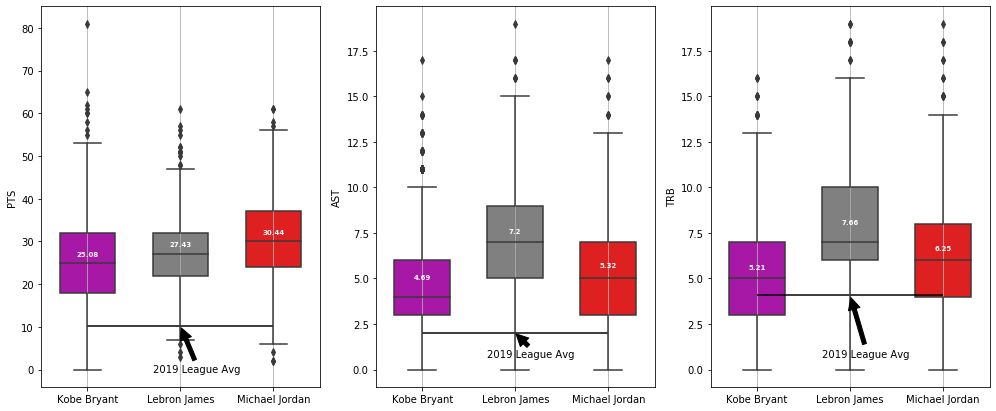

In [17]:

plt.subplots(1, 3,figsize=(17,7))
my_pal = {"Kobe Bryant": "m", "Lebron James": "grey", "Michael Jordan":"r"}

ax = plt.subplot(1,3,1)
ax = sns.boxplot(x="Player", y="PTS", data=allgamestats, width=.6, palette=my_pal)
ax.xaxis.grid(True)
ax.set(xlabel="")
ax.hlines(10.2,0,2)
means = allgamestats.groupby(['Player'])['PTS'].mean()
means = round(means,2)
vertical_offset = allgamestats['PTS'].mean() * 0.05 # offset from median for display
for xtick in ax.get_xticks():
    ax.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
ax.annotate('2019 League Avg', xy=(1, 10.2),  xycoords='data',
            xytext=(0.4, 0.06), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top',
            )
    
ax1 = plt.subplot(1,3,2)
ax1 = sns.boxplot(x="Player", y="AST", data=allgamestats, width=.6,palette=my_pal)
ax1.xaxis.grid(True)
ax1.set(xlabel="")
ax1.hlines(2,0,2)
means = allgamestats.groupby(['Player'])['AST'].mean()
means = round(means,2)
vertical_offset = allgamestats['AST'].mean() * 0.05 # offset from median for display
for xtick in ax1.get_xticks():
    ax1.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
ax1.annotate('2019 League Avg', xy=(1, 2),  xycoords='data',
            xytext=(0.4, 0.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top',
            )
    
ax2 = plt.subplot(1,3,3)
ax2 = sns.boxplot(x="Player", y="TRB", data=allgamestats, width=.6,palette=my_pal)
ax2.xaxis.grid(True)
ax2.hlines(4.1,0,2)
ax2.set(xlabel="")
means = allgamestats.groupby(['Player'])['TRB'].mean()
means = round(means,2)
vertical_offset = allgamestats['TRB'].mean() * 0.05 # offset from median for display
for xtick in ax2.get_xticks():
    ax2.text(xtick,means[xtick] + vertical_offset,means[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
ax2.annotate('2019 League Avg', xy=(1, 4.1),  xycoords='data',
            xytext=(0.4, 0.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left', verticalalignment='top',
            )




As we can see, they're way above the 2019 league averages for Points and Assists. We can see Michael Jordan on average scored more than Kobe and Lebron, but Lebron had more Assists and Rebounds.

### Key Performance Indicators Over Time


We can use a line plot through Seaborn to get aggregate values (Points, Assists, Rebounds, etc..) over their time in the league. The line plot shows the average along with the 95% confidence interval. We also have to transform the date to a datetime object that pandas is familiar with.

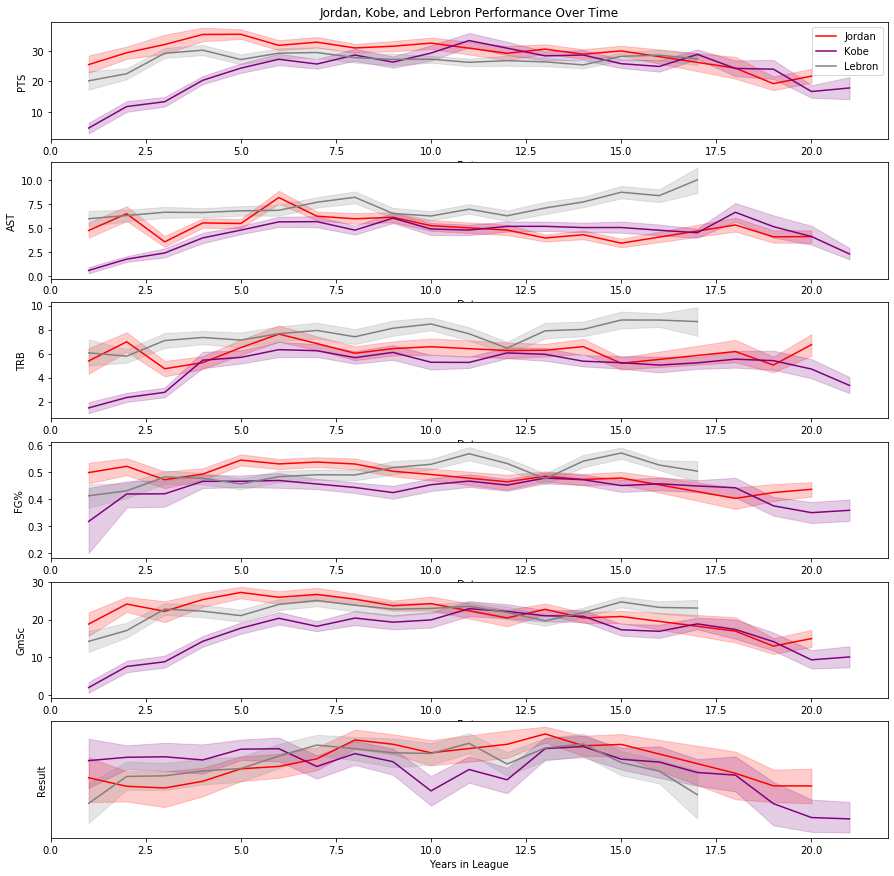

In [18]:
lebron = allgamestats.loc[allgamestats['Player'] == 'Lebron James']
kobe = allgamestats.loc[allgamestats['Player'] == 'Kobe Bryant']
jordan = allgamestats.loc[allgamestats['Player'] == 'Michael Jordan']
jordan.reset_index(level=0, inplace=True)
lebron.reset_index(level=0, inplace=True)
kobe.reset_index(level=0, inplace=True)
kobe['Date'] = pd.to_datetime(kobe['Date'])
lebron['Date'] = pd.to_datetime(lebron['Date'])
jordan['Date'] = pd.to_datetime(jordan['Date'])

plt.subplots(figsize=(15,15))
ax = plt.subplot(6,1,1)
sns.lineplot(jordan['Date'].dt.year.apply(lambda x: x-1983), jordan['PTS'], color='red', label ='Jordan')
sns.lineplot(kobe['Date'].dt.year.apply(lambda x: x-1995), kobe['PTS'], color='purple',label='Kobe')
sns.lineplot(lebron['Date'].dt.year.apply(lambda x: x-2002), lebron['PTS'], color='grey',label='Lebron')

ax1 = plt.subplot(6,1,2)
sns.lineplot(jordan['Date'].dt.year.apply(lambda x: x-1983), jordan['AST'], color='red')
sns.lineplot(kobe['Date'].dt.year.apply(lambda x: x-1995), kobe['AST'], color='purple')
sns.lineplot(lebron['Date'].dt.year.apply(lambda x: x-2002), lebron['AST'], color='grey')

ax2 = plt.subplot(6,1,3)
sns.lineplot(jordan['Date'].dt.year.apply(lambda x: x-1983), jordan['TRB'], color='red')
sns.lineplot(kobe['Date'].dt.year.apply(lambda x: x-1995), kobe['TRB'], color='purple')
sns.lineplot(lebron['Date'].dt.year.apply(lambda x: x-2002), lebron['TRB'], color='grey')

ax3 = plt.subplot(6,1,4)
sns.lineplot(jordan['Date'].dt.year.apply(lambda x: x-1983), jordan['FG%'], color='red')
sns.lineplot(kobe['Date'].dt.year.apply(lambda x: x-1995), kobe['FG%'], color='purple')
sns.lineplot(lebron['Date'].dt.year.apply(lambda x: x-2002), lebron['FG%'], color='grey')

ax5 = plt.subplot(6,1,5)
sns.lineplot(jordan['Date'].dt.year.apply(lambda x: x-1983), jordan['GmSc'], color='red')
sns.lineplot(kobe['Date'].dt.year.apply(lambda x: x-1995), kobe['GmSc'], color='purple')
sns.lineplot(lebron['Date'].dt.year.apply(lambda x: x-2002), lebron['GmSc'], color='grey')

ax6 = plt.subplot(6,1,6)
sns.lineplot(jordan['Date'].dt.year.apply(lambda x: x-1983), jordan['Result'], color='red')
sns.lineplot(kobe['Date'].dt.year.apply(lambda x: x-1995), kobe['Result'], color='purple')
sns.lineplot(lebron['Date'].dt.year.apply(lambda x: x-2002), lebron['Result'], color='grey')
ax6.set_xlabel("Years in League")

ax.set_title('Jordan, Kobe, and Lebron Performance Over Time')

ax.legend()

Some observations for the 'Points' chart, is that MJ slowly declined, Kobe had a parabolic trend, while Lebron was consistent.

For 'Assists', Kobe and Jordan stayed relatively consistent while Lebron dished more assists with time in the league. Same can be seen for rebounding. 

For 'Field Goal %' Lebron is also steadily increasing as he spends more time in the league.

The 'GmSc' or Game Score was created to give a total value on a players statistical performance, it can be found [here](https://captaincalculator.com/sports/basketball/game-score-calculator/). As you can see, Lebron stayed consistent, while MJ and Kobe both slowly declined near the end of their careers.

An interesting outcome of the 'Results' chart shows that the games won for each player starts declining at around year 15 in the league. This is much sharper in Lebron's case (which could indicate that his team isn't enough to win some games).

For Kobe we can see a flat parabolic shape, and MJ a gradual decline. Lebrons trajectory is different since he is currently still in the league, but we may see a decline before he leaves, or he may be the first player to retire while in an uptrend in a majority of the facets of basketball.


## Per Game Average over Time

Some interesting metrics to look at is a players effeciency from the 3-pointer, the field, and their effective field goal percentage. We can use another line graph to observe these values over the Age-span of these players.

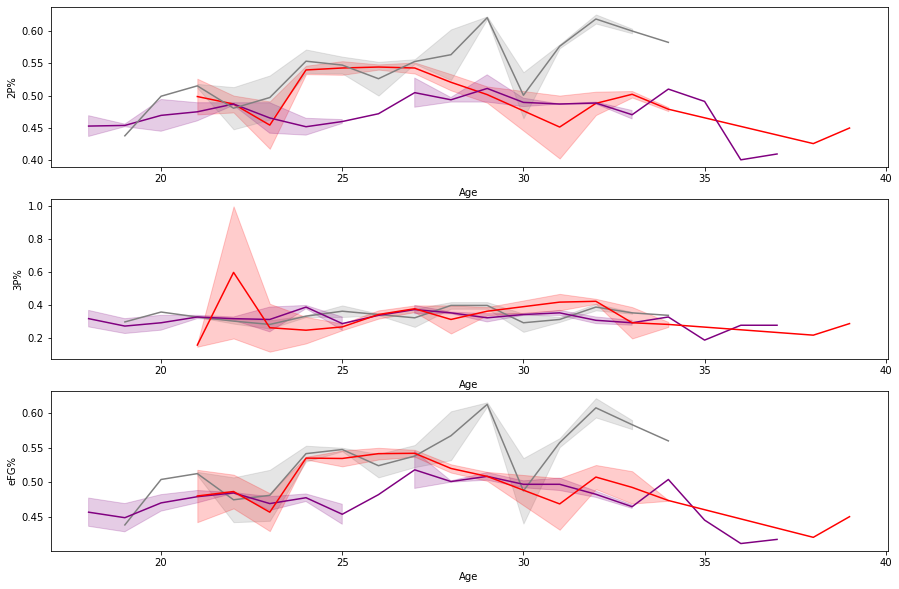

In [19]:
#comparing pergame average over seasons for 2P%, 3P%, and eFG%
lebron = pergame.loc[pergame['Player'] == 'Lebron James']
kobe = pergame.loc[pergame['Player'] == 'Kobe Bryant']
jordan = pergame.loc[pergame['Player'] == 'Michael Jordan']
jordan.reset_index(level=0, inplace=True)
lebron.reset_index(level=0, inplace=True)
kobe.reset_index(level=0, inplace=True)
#jordan.head()

plt.subplots(figsize=(15,10))
ax = plt.subplot(311)
ax = sns.lineplot(jordan['Age'],jordan['2P%'], color='Red')
ax = sns.lineplot(kobe['Age'],kobe['2P%'],color='Purple')
ax = sns.lineplot(lebron['Age'],lebron['2P%'],color='Grey')

ax1 = plt.subplot(312)
ax1 = sns.lineplot(lebron['Age'],lebron['3P%'],color='Grey')
ax1 = sns.lineplot(kobe['Age'],kobe['3P%'],color='purple')
ax1 = sns.lineplot(jordan['Age'],jordan['3P%'],color='red')

ax1 = plt.subplot(313)
ax1 = sns.lineplot(lebron['Age'],lebron['eFG%'],color='Grey')
ax1 = sns.lineplot(kobe['Age'],kobe['eFG%'],color='purple')
ax1 = sns.lineplot(jordan['Age'],jordan['eFG%'],color='red')

#sns.lineplot(jordan['FG'], jordan['PTS'], color='red')
#sns.lineplot(kobe['FG'], kobe['PTS'], color='purple')
#sns.lineplot(lebron['FG'], lebron['PTS'], color='grey').set_title('Jordan = Red / Kobe = Purple / Lebron = Yellow')
#ax.set(xlabel='FG', ylabel='Points Scored per Game')


It can be observed that all 3 players are relatively similar in 3P%. When it comes to Jordan and Kobe you can see the decline in effeciency come with age, but for Lebron, he is still climbing. His eFG% and 2P% is significantly higher than MJ and Kobe. Currently, we can see as of the last ~2 years, he has been in a downtrend, which we see in the other players at this Age. This could signify that Lebron may share a similar fate and retire in the upcoming years as his efficiency decreases. 

## Wrapping it All Up

We can see that strictly in terms of longevity, consistency, and effeciency, Lebron has been really leaving his mark. Interestingly enough, this doesn't always lead to Championships, as we've seen his Wins decline faster than the other two. Some other factors that make a legendary player is the grit they bring to games. 

I want to use a swarm plot to show some amazing feats that these players have accomplished.


Text(0.5, 0.98, 'Spread of Field Goals Attempted')

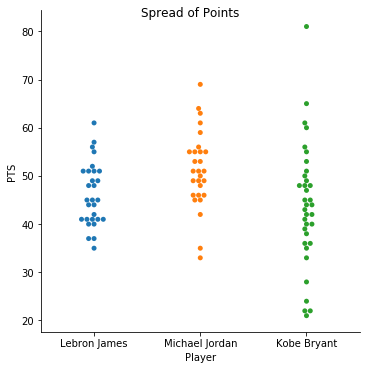

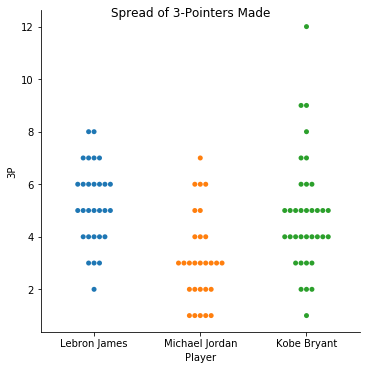

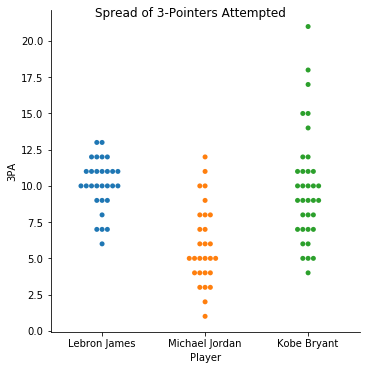

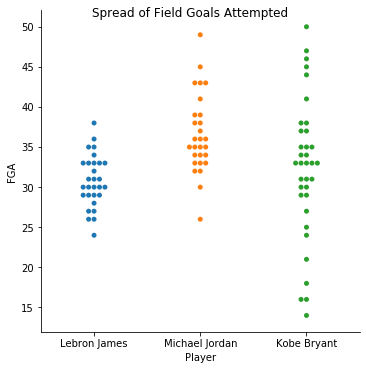

In [22]:

ax =sns.catplot( x="Player", y="PTS", kind="swarm", data=gamehigh,ax=ax)
fig = ax.fig
fig.suptitle('Spread of Points')

ax1 = sns.catplot(x="Player", y="3P", kind="swarm", data=gamehigh,ax=ax1)
fig1 = ax1.fig
fig1.suptitle('Spread of 3-Pointers Made')

ax2 = sns.catplot(x="Player", y="3PA", kind="swarm", data=gamehigh,ax=ax2)
fig2 = ax2.fig
fig2.suptitle('Spread of 3-Pointers Attempted')

ax3 = sns.catplot(x="Player", y="FGA", kind="swarm", data=gamehigh,ax=ax3)
fig3 = ax3.fig
fig3.suptitle('Spread of Field Goals Attempted')


#sns.histplot(x='PTS',data=df)
#sns.displot(x='Michael Jordan',hue='Player',data=df,kde=True)

When analyzing MJ, Lebron, and Kobe's game highs, we can see each scored 69, 61, and 81 points. 
Lebron has scored 8 3-pointers twice in his career, MJ has scored 7, and Kobe scored 9 3-pointers twice and a once league record 12 3-pointers made!

From the bottom two swarm plots, we see 3-pointers and field goals attempted; it's obvious lebron is a bit more selective with his shots which is supported by his incredible effeciency rating. Kobe and Jordan were fearless when it came to jacking up shots, Kobe even attempted more than 20 3-pointers and both Kobe and Jordan attempted more than 50 Field Goals in a single game.

That's part of what makes this debate so tough. There are so many factors at play and this is just scratching the surface. Lebron is the most effecient out of the bunch, Jordan is the best scorer, and Kobe has some of the most incredible accolades to date.

